In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('./random-linear-regression/train.csv')

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
# check if there are any NULL values
data.isnull().values.any()

True

In [5]:
# drop the null values
data = data.dropna()

In [6]:
X=np.array(data['x'])
y=np.array(data['y'])
print(X.shape, y.shape)

(699,) (699,)


In [7]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


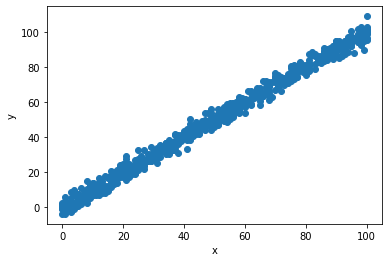

In [8]:
plt.scatter(data['x'], y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
# hyperparameters
n_epochs = 500
learning_rate = 0.01

In [10]:
# initialize coefficients
m = X.shape[0]
beta0=np.random.uniform(0, 1) #0.6
beta1=np.random.uniform(0, 1) #1
print("Initializing coefficients->")
print("Intercept: ", beta0)
print("slope: ", beta1)

Initializing coefficients->
Intercept:  0.9976129832977231
slope:  0.7924984046314443


In [11]:
# Cost function
def cost_function(pred, y):
    return (y - pred) ** 2

In [24]:
def cost_function_batch(X, y, beta0, beta1):
    return np.sum((y - (beta0 + beta1 * X))**2 /m)

In [19]:
'''
    Stochastic gradient Descent
'''
def gradient_descent(X, y, lr, beta0, beta1, m, n_epochs):
    for ep in range(n_epochs):
        loss, beta0_grad, beta1_grad = 0, 0, 0
        for j in range(m):  
            pred = beta0 + beta1 * X[j]         # prediction
            loss += cost_function(pred, y[j])/m
            beta1_grad = (-2/m * X[j] * (y[j] - pred))
            beta0_grad = (-2/m * (y[j] - pred))
            beta0 -= (learning_rate * beta0_grad)
            beta1 -= (learning_rate * beta1_grad)
        print("Iteration {}, Loss {:.3f}".format(ep+1, loss))
    return beta0, beta1

In [26]:
print("Running for {} iterations".format(n_epochs))
beta0, beta1=gradient_descent(X, y, learning_rate, beta0, beta1, m, n_epochs)
print("Final loss value: ", cost_function_batch(X, y, beta0, beta1))

Running for 500 iterations
Iteration 1, Loss 8.278
Iteration 2, Loss 8.278
Iteration 3, Loss 8.278
Iteration 4, Loss 8.278
Iteration 5, Loss 8.278
Iteration 6, Loss 8.278
Iteration 7, Loss 8.278
Iteration 8, Loss 8.278
Iteration 9, Loss 8.278
Iteration 10, Loss 8.278
Iteration 11, Loss 8.278
Iteration 12, Loss 8.278
Iteration 13, Loss 8.278
Iteration 14, Loss 8.278
Iteration 15, Loss 8.278
Iteration 16, Loss 8.278
Iteration 17, Loss 8.278
Iteration 18, Loss 8.278
Iteration 19, Loss 8.278
Iteration 20, Loss 8.278
Iteration 21, Loss 8.278
Iteration 22, Loss 8.278
Iteration 23, Loss 8.278
Iteration 24, Loss 8.278
Iteration 25, Loss 8.278
Iteration 26, Loss 8.278
Iteration 27, Loss 8.278
Iteration 28, Loss 8.278
Iteration 29, Loss 8.278
Iteration 30, Loss 8.278
Iteration 31, Loss 8.278
Iteration 32, Loss 8.278
Iteration 33, Loss 8.278
Iteration 34, Loss 8.278
Iteration 35, Loss 8.278
Iteration 36, Loss 8.278
Iteration 37, Loss 8.278
Iteration 38, Loss 8.278
Iteration 39, Loss 8.278
Iterati

Iteration 366, Loss 8.278
Iteration 367, Loss 8.278
Iteration 368, Loss 8.278
Iteration 369, Loss 8.278
Iteration 370, Loss 8.278
Iteration 371, Loss 8.278
Iteration 372, Loss 8.278
Iteration 373, Loss 8.278
Iteration 374, Loss 8.278
Iteration 375, Loss 8.278
Iteration 376, Loss 8.278
Iteration 377, Loss 8.278
Iteration 378, Loss 8.278
Iteration 379, Loss 8.278
Iteration 380, Loss 8.278
Iteration 381, Loss 8.278
Iteration 382, Loss 8.278
Iteration 383, Loss 8.278
Iteration 384, Loss 8.278
Iteration 385, Loss 8.278
Iteration 386, Loss 8.278
Iteration 387, Loss 8.278
Iteration 388, Loss 8.278
Iteration 389, Loss 8.278
Iteration 390, Loss 8.278
Iteration 391, Loss 8.278
Iteration 392, Loss 8.278
Iteration 393, Loss 8.278
Iteration 394, Loss 8.278
Iteration 395, Loss 8.278
Iteration 396, Loss 8.278
Iteration 397, Loss 8.278
Iteration 398, Loss 8.278
Iteration 399, Loss 8.278
Iteration 400, Loss 8.278
Iteration 401, Loss 8.278
Iteration 402, Loss 8.278
Iteration 403, Loss 8.278
Iteration 40

In [14]:
# final coefficients
print("Coefficients->")
print("Intercept: ", beta0)
print("slope: ", beta1)

Coefficients->
Intercept:  -0.07024571311720391
slope:  1.0015639095541862


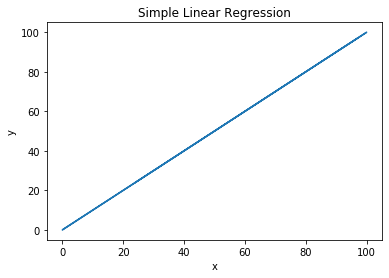

In [16]:
# Plot the curve
plt.plot(X, beta0+beta1*X)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression (Python)')
plt.show()

In [17]:
# using sklearn
regressor = LinearRegression()
train_x = np.array(data['x']).reshape(-1, 1)
regressor.fit(train_x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

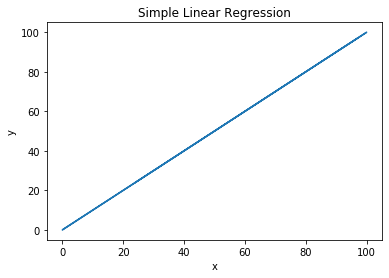

In [18]:
# plt.scatter(data['x'], y)
plt.plot(train_x, regressor.predict(train_x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression (Sklearn)')
plt.show()

In [ ]:
# final coefficients
print("Coefficients->")
print("Intercept: ", regressor.intercept_)
print("slope: ", regressor.coef_)